In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class Bandit:
    def __init__(self, mu):
        # True average of current bandit
        self.mu = mu
        # Sampling mean
        self.mean = 0
        self.N = 0
    def pull(self):
        return np.random.randn() + self.mu
    
    def update(self, x):
        # Update the mean using the new datapoint
        self.N += 1
        aN = 1.0/self.N
        self.mean = (1.0 - aN)*self.mean + aN* x
        
    def get_mean(self):
        return self.mean

In [7]:
def run_MultiBandit_Arm_UCB1(m1=0.2,m2=0.4,N_iter=10000):
    def _cumulative_average(data):
        return np.cumsum(data) / (np.arange(len(data))+1)
    
    def _UCB1(mean, n_total, n_arm):
        # n_arm: number of times arm is used
        # n_total: Total number of experiment runs
        # sampling mean
        # To avoid division by zero, add to n_arm
        pert = 1e-16
        return mean + np.sqrt(2.0*np.log(n_total)/(n_arm + pert))
    
    bandits = [Bandit(m1), Bandit(m2)]
    data = np.empty(N_iter)
    for i in range(N_iter):
        which_bandit = np.argmax([_UCB1(b.get_mean(), i+1, b.N) for b in bandits])
        x = bandits[which_bandit].pull()
        data[i] = x
    return _cumulative_average(data)

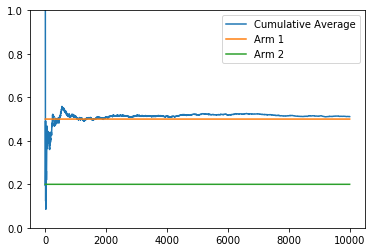

In [8]:
m1 = 0.5
m2 = 0.2
m_upper_limit=5
accum_avg = run_MultiBandit_Arm_UCB1(m1=m1, m2=m2, N_iter=10000)
plt.plot(accum_avg, label='Cumulative Average')
plt.plot(np.ones(len(accum_avg))*m1, label='Arm 1')
plt.plot(np.ones(len(accum_avg))*m2, label='Arm 2')
plt.legend()
plt.ylim([0,1])
plt.show()